In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
with_hqe = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_6008_seed_2008_spsiceftp_with_hqe_new_muon_20250612_011420_new_loss.parquet')

no_hqe = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_5008_seed_2008_spsiceftp_no_hqe_new_muon_20250612_011640_new_loss.parquet')


In [7]:
with_hqe

,mc_truth,photons
0,"{'interaction': 1, 'initial_state_energy': 1.5...","{'sensor_pos_x': [27.12, 47.56, 41.6], 'sensor..."
1,"{'interaction': 1, 'initial_state_energy': 47....","{'sensor_pos_x': [27.12, 18.51, 18.51, 18.51, ..."
2,"{'interaction': 1, 'initial_state_energy': 50....","{'sensor_pos_x': [-10.97, -10.97, 27.12, -9.68..."
3,"{'interaction': 2, 'initial_state_energy': 1.9...","{'sensor_pos_x': [57.2], 'sensor_pos_y': [-105..."
4,"{'interaction': 1, 'initial_state_energy': 3.6...","{'sensor_pos_x': [-10.97, 62.91, 47.56, 62.91,..."
...,...,...
9995,"{'interaction': 2, 'initial_state_energy': 30....","{'sensor_pos_x': [14.48], 'sensor_pos_y': [-82..."
9996,"{'interaction': 1, 'initial_state_energy': 23....","{'sensor_pos_x': [31.25, 18.51, 57.3, 14.48, -..."
9997,"{'interaction': 1, 'initial_state_energy': 8.5...","{'sensor_pos_x': [113.19, 46.29, 89.47, 113.19..."
9998,"{'interaction': 1, 'initial_state_energy': 3.9...","{'sensor_pos_x': [57.3, -9.68], 'sensor_pos_y'..."


In [8]:
no_hqe

,mc_truth,photons
0,"{'interaction': 1, 'initial_state_energy': 1.5...","{'sensor_pos_x': [72.37, 57.3, 18.51, 14.48, 3..."
1,"{'interaction': 1, 'initial_state_energy': 47....","{'sensor_pos_x': [57.3, 57.3, 57.3, 57.3, 57.2..."
2,"{'interaction': 1, 'initial_state_energy': 50....","{'sensor_pos_x': [47.56, 14.48, -9.68, 14.48, ..."
3,"{'interaction': 2, 'initial_state_energy': 1.9...","{'sensor_pos_x': [], 'sensor_pos_y': [], 'sens..."
4,"{'interaction': 1, 'initial_state_energy': 3.6...","{'sensor_pos_x': [-9.68, 62.91, 72.37, -9.68, ..."
...,...,...
9995,"{'interaction': 2, 'initial_state_energy': 30....","{'sensor_pos_x': [], 'sensor_pos_y': [], 'sens..."
9996,"{'interaction': 1, 'initial_state_energy': 23....","{'sensor_pos_x': [57.3, 113.19, 57.2, 57.3, 72..."
9997,"{'interaction': 1, 'initial_state_energy': 8.5...","{'sensor_pos_x': [194.34, 62.91, 41.6, 31.25, ..."
9998,"{'interaction': 1, 'initial_state_energy': 3.9...","{'sensor_pos_x': [62.91, 62.91, 27.12, 31.25, ..."


In [19]:
n_hits_with_hqe = np.zeros(10000)
n_unique_hits_with_hqe= np.zeros(10000)


n_hits_no_hqe= np.zeros(10000)
n_unique_hits_no_hqe= np.zeros(10000)

n_hits_with_hqe = np.zeros(10000)
n_unique_hits_with_hqe = np.zeros(10000)
max_hits_idx = 0
max_hits = 0
most_doms_hit_idx = 0
max_unique_doms = 0
for i in range(10000):
    n_hits_no_hqe[i] = len(no_hqe['photons'][i]['t'])
    n_unique_hits_no_hqe[i] = len(set(zip(no_hqe['photons'][i]['string_id'], no_hqe['photons'][i]['sensor_id'])))

    # n_hits_no_hqe[i] = len(no_hqe['photons'][i]['t'])
    # n_unique_hits_no_hqe[i] = len(set(zip(no_hqe['photons'][i]['string_id'], no_hqe['photons'][i]['sensor_id'])))

    n_hits_with_hqe[i] = len(with_hqe['photons'][i]['t'])
    n_unique_hits_with_hqe[i] = len(set(zip(with_hqe['photons'][i]['string_id'], with_hqe['photons'][i]['sensor_id'])))

    if n_hits_no_hqe[i] > max_hits:
        max_hits = n_hits_no_hqe[i] 
        max_hits_idx=i
        
    if n_unique_hits_no_hqe[i] > max_unique_doms:
        most_doms_hit_idx=i
        max_unique_doms = n_unique_hits_no_hqe[i] 

In [20]:
n_hits_no_hqe, n_unique_hits_no_hqe

(array([  6., 108.,  55., ...,   8.,   7.,   6.]),
 array([ 6., 48., 51., ...,  8.,  6.,  6.]))

In [26]:
most_doms_hit_idx, max_unique_doms, n_unique_hits_no_hqe[most_doms_hit_idx], n_unique_hits_with_hqe[most_doms_hit_idx]

(9808, 270.0, 270.0, 74.0)

[]

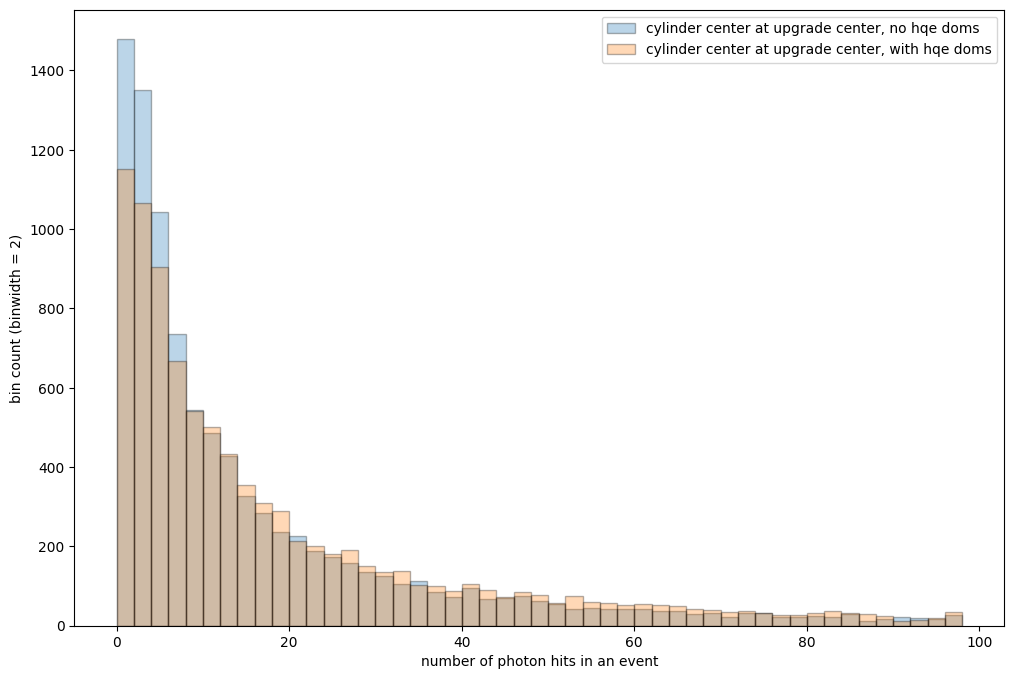

In [23]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_hits_no_hqe, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at upgrade center, no hqe doms')

plt.hist(n_hits_with_hqe, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at upgrade center, with hqe doms')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

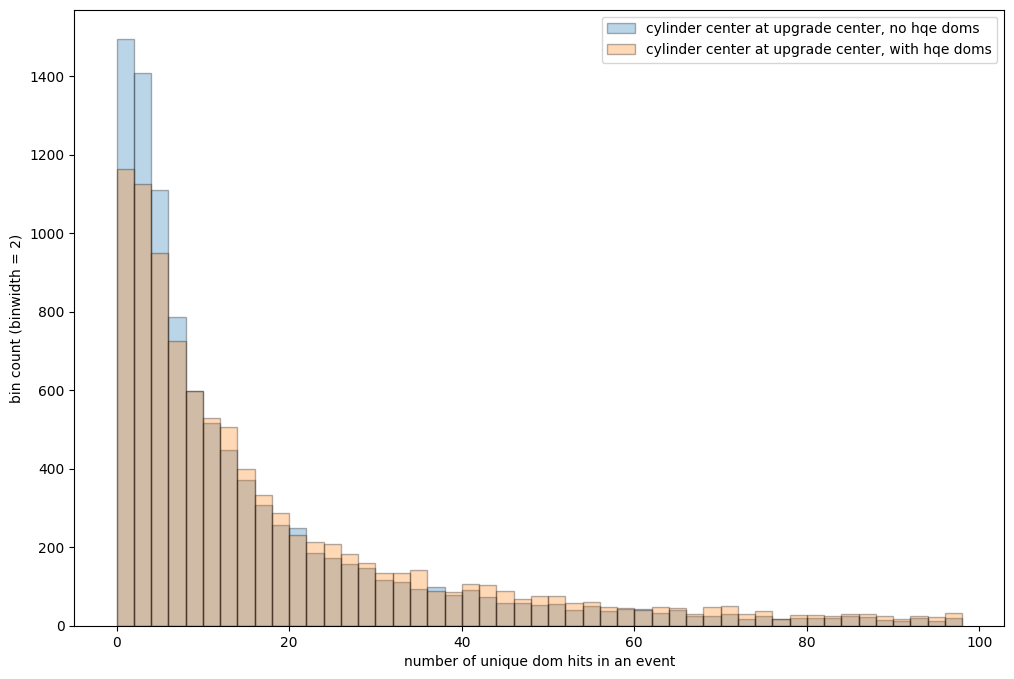

In [24]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_unique_hits_no_hqe, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at upgrade center, no hqe doms')

plt.hist(n_unique_hits_with_hqe, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at upgrade center, with hqe doms')
plt.xlabel('number of unique dom hits in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

In [29]:
no_hqe['mc_truth'][most_doms_hit_idx]

{'interaction': 1,
 'initial_state_energy': 91.92071470675994,
 'initial_state_type': 14,
 'initial_state_zenith': 0.5596449783497714,
 'initial_state_azimuth': -2.793454352021712,
 'initial_state_x': 65.79929794733812,
 'initial_state_y': -65.18287339010091,
 'initial_state_z': -2267.5567007755526,
 'final_state_energy': array([4.12973429e+01, 3.02356236e-02, 4.35997878e-02, 3.18229631e-02,
        1.04632321e+01, 3.12825178e+01, 1.81662173e+00, 4.40711332e+00,
        3.72019919e-01, 3.02701486e+00, 1.79338027e-01]),
 'final_state_type': array([   13.,    11.,    14.,   -12.,   211.,  2112.,   111., -2112.,
          111.,  2112.,   211.]),
 'final_state_zenith': array([0.55937442, 1.0495787 , 1.56430459, 2.07364752, 0.55848447,
        0.55807482, 0.57161939, 0.55902181, 0.68545342, 0.42360078,
        0.5191242 ]),
 'final_state_azimuth': array([-2.79491365,  2.76524669,  0.28027795, -2.24998289, -2.79848202,
        -2.80513781, -2.90828517, -2.79654473, -3.06626436, -3.03868768,


In [30]:
with_hqe['mc_truth'][most_doms_hit_idx]

{'interaction': 1,
 'initial_state_energy': 91.92071470675994,
 'initial_state_type': 14,
 'initial_state_zenith': 1.7357223490475233,
 'initial_state_azimuth': -1.9897152880369904,
 'initial_state_x': 133.37189664599396,
 'initial_state_y': -42.192989339000825,
 'initial_state_z': -2171.4541591797815,
 'final_state_energy': array([4.12973429e+01, 3.02356236e-02, 4.35997878e-02, 3.18229631e-02,
        1.04632321e+01, 3.12825178e+01, 1.81662173e+00, 4.40711332e+00,
        3.72019919e-01, 3.02701486e+00, 1.79338027e-01]),
 'final_state_type': array([   13.,    11.,    14.,   -12.,   211.,  2112.,   111., -2112.,
          111.,  2112.,   211.]),
 'final_state_zenith': array([1.73497671, 1.0495787 , 1.56430459, 2.07364752, 1.73299483,
        1.73015624, 1.69709742, 1.73410832, 1.68306273, 1.56152969,
        1.63545582]),
 'final_state_azimuth': array([-1.99006226,  2.76524669,  0.28027795, -2.24998289, -1.99073809,
        -1.99289693, -2.0396    , -1.99041186, -2.18664454, -1.9538181

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_icecube_event(data_dict, event_idx, geo_file_path=None, figsize=(14, 10), 
                      show_doms=True, show_arrows=True, interactive=False):
    """
    Plot an IceCube neutrino event in 3D showing detector hits, particle tracks, and geometry.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' and 'mc_truth' keys with event data
    event_idx : int
        Index of the event to plot
    geo_file_path : str, optional
        Path to the .geo file containing DOM positions
    figsize : tuple, optional
        Figure size (width, height)
    show_doms : bool, optional
        Whether to show DOM positions
    show_arrows : bool, optional
        Whether to show arrows on particle tracks
    interactive : bool, optional
        Whether to create an interactive Plotly plot (requires plotly)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure or plotly.graph_objects.Figure
        The created figure object
    """
    
    # Extract photon data for the event
    photons = data_dict['photons'][event_idx]
    sensor_pos_x = photons['sensor_pos_x']
    sensor_pos_y = photons['sensor_pos_y']
    sensor_pos_z = photons['sensor_pos_z']
    sensor_t = photons['t']
    
    # Get the MC truth data for the same event
    mc_truth = data_dict['mc_truth'][event_idx]
    
    # Initial state (neutrino) position and direction
    initial_x = mc_truth['initial_state_x']
    initial_y = mc_truth['initial_state_y']
    initial_z = mc_truth['initial_state_z']
    initial_zenith = mc_truth['initial_state_zenith']
    initial_azimuth = mc_truth['initial_state_azimuth']
    
    # Find the muon (particle type 13) in final state
    muon_mask = mc_truth['final_state_type'] == 13
    muon_data = None
    if np.any(muon_mask):
        muon_idx = np.where(muon_mask)[0][0]  # Get first muon
        muon_data = {
            'energy': mc_truth['final_state_energy'][muon_idx],
            'zenith': mc_truth['final_state_zenith'][muon_idx],
            'azimuth': mc_truth['final_state_azimuth'][muon_idx],
            'x': mc_truth['final_state_x'][muon_idx],
            'y': mc_truth['final_state_y'][muon_idx],
            'z': mc_truth['final_state_z'][muon_idx]
        }
    
    # Convert spherical to Cartesian for direction vectors
    def spherical_to_cartesian(zenith, azimuth):
        """Convert zenith/azimuth angles to Cartesian direction vector"""
        x = np.sin(zenith) * np.cos(azimuth)
        y = np.sin(zenith) * np.sin(azimuth)
        z = np.cos(zenith)
        return x, y, z
    
    # Get direction vectors
    initial_dir_x, initial_dir_y, initial_dir_z = spherical_to_cartesian(initial_zenith, initial_azimuth)
    if muon_data:
        muon_dir_x, muon_dir_y, muon_dir_z = spherical_to_cartesian(muon_data['zenith'], muon_data['azimuth'])
    
    # Find 3 most energetic non-muon particles
    non_muon_mask = mc_truth['final_state_type'] != 13
    top_particles = []
    if np.any(non_muon_mask):
        non_muon_energies = mc_truth['final_state_energy'][non_muon_mask]
        non_muon_indices = np.where(non_muon_mask)[0]
        sorted_indices = np.argsort(non_muon_energies)[::-1]  # Descending order
        top_3_indices = non_muon_indices[sorted_indices[:3]]
        
        for idx in top_3_indices:
            top_particles.append({
                'type': int(mc_truth['final_state_type'][idx]),
                'energy': mc_truth['final_state_energy'][idx],
                'zenith': mc_truth['final_state_zenith'][idx],
                'azimuth': mc_truth['final_state_azimuth'][idx]
            })
    
    # PDG code to particle name mapping
    pdg_names = {
        22: 'γ', 11: 'e⁻', -11: 'e⁺', 12: 'νₑ', -12: 'ν̄ₑ', 14: 'νμ', -14: 'ν̄μ',
        211: 'π⁺', -211: 'π⁻', 111: 'π⁰', 2212: 'p', 2112: 'n', 13: 'μ⁻', -13: 'μ⁺',
    }
    
    if interactive:
        # Create interactive Plotly plot
        try:
            import plotly.graph_objects as go
        except ImportError:
            print("Plotly not installed. Falling back to matplotlib.")
            interactive = False
    
    if interactive:
        # Plotly version
        fig = go.Figure()
        
        # Get unique sensor positions and count hits per DOM
        unique_positions, inverse_indices, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_inverse=True, return_counts=True
        )
        unique_x, unique_y, unique_z = unique_positions[:, 0], unique_positions[:, 1], unique_positions[:, 2]
        
        # Get mean time for each unique DOM position
        mean_times = np.zeros(len(unique_positions))
        for i in range(len(unique_positions)):
            dom_mask = inverse_indices == i
            mean_times[i] = sensor_t[dom_mask].mean()
        
        hit_sizes = 8 + hit_counts * 2  # Scale for plotly
        
        # Add detector hits
        fig.add_trace(go.Scatter3d(
            x=unique_x, y=unique_y, z=unique_z,
            mode='markers',
            marker=dict(size=hit_sizes, color=mean_times, colorscale='viridis',
                       colorbar=dict(title="Mean Time (ns)"), opacity=0.8),
            name='Detector hits'
        ))
        
        # Add interaction vertex
        fig.add_trace(go.Scatter3d(
            x=[initial_x], y=[initial_y], z=[initial_z],
            mode='markers',
            marker=dict(size=15, color='red', symbol='x'),
            name='Interaction vertex'
        ))
        
        # Add neutrino track
        track_length = 100
        neutrino_end_x = initial_x - track_length * initial_dir_x
        neutrino_end_y = initial_y - track_length * initial_dir_y
        neutrino_end_z = initial_z - track_length * initial_dir_z
        
        fig.add_trace(go.Scatter3d(
            x=[neutrino_end_x, initial_x], y=[neutrino_end_y, initial_y], z=[neutrino_end_z, initial_z],
            mode='lines', line=dict(color='red', width=6, dash='dash'), name='Incoming neutrino'
        ))
        
        # Add muon track
        if muon_data:
            muon_track_length = min(200, muon_data['energy'] * 10)
            muon_end_x = muon_data['x'] + muon_track_length * muon_dir_x
            muon_end_y = muon_data['y'] + muon_track_length * muon_dir_y
            muon_end_z = muon_data['z'] + muon_track_length * muon_dir_z
            
            fig.add_trace(go.Scatter3d(
                x=[muon_data['x'], muon_end_x], y=[muon_data['y'], muon_end_y], z=[muon_data['z'], muon_end_z],
                mode='lines', line=dict(color='blue', width=8), name=f'μ⁻ ({muon_data["energy"]:.1f} GeV)'
            ))
        
        # Add other particles
        colors = ['green', 'orange', 'purple']
        for i, particle in enumerate(top_particles):
            if i >= 3: break
            particle_name = pdg_names.get(particle['type'], f'PDG{particle["type"]}')
            part_dir_x, part_dir_y, part_dir_z = spherical_to_cartesian(particle['zenith'], particle['azimuth'])
            part_length = min(150, particle['energy'] * 15)
            part_end_x = initial_x + part_length * part_dir_x
            part_end_y = initial_y + part_length * part_dir_y
            part_end_z = initial_z + part_length * part_dir_z
            
            fig.add_trace(go.Scatter3d(
                x=[initial_x, part_end_x], y=[initial_y, part_end_y], z=[initial_z, part_end_z],
                mode='lines', line=dict(color=colors[i], width=4), opacity=0.5,
                name=f'{particle_name} ({particle["energy"]:.2f} GeV)'
            ))
        
        # Add DOMs if requested
        if show_doms and geo_file_path:
            try:
                dom_data = np.loadtxt(geo_file_path, skiprows=4)
                dom_x, dom_y, dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
                
                # Filter DOMs to region
                x_min, x_max = sensor_pos_x.min(), sensor_pos_x.max()
                y_min, y_max = sensor_pos_y.min(), sensor_pos_y.max()
                z_min, z_max = sensor_pos_z.min(), sensor_pos_z.max()
                dom_mask = ((dom_x >= x_min) & (dom_x <= x_max) & 
                           (dom_y >= y_min) & (dom_y <= y_max) & 
                           (dom_z >= z_min) & (dom_z <= z_max))
                
                fig.add_trace(go.Scatter3d(
                    x=dom_x[dom_mask], y=dom_y[dom_mask], z=dom_z[dom_mask],
                    mode='markers', marker=dict(size=2, color='black', opacity=0.4), name='DOMs'
                ))
            except:
                print("Could not load DOM geometry file")
        
        # Update layout
        fig.update_layout(
            title=f'IceCube Event {event_idx} - {len(sensor_t)} hits<br>'
                  f'Initial E: {mc_truth["initial_state_energy"]:.1f} GeV',
            scene=dict(xaxis_title='X Position (m)', yaxis_title='Y Position (m)', 
                      zaxis_title='Z Position (m)', aspectmode='data'),
            width=1000, height=800
        )
        
    else:
        # Matplotlib version
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(projection='3d')
        
        # Get unique sensor positions and count hits per DOM
        unique_positions, inverse_indices, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_inverse=True, return_counts=True
        )
        unique_x, unique_y, unique_z = unique_positions[:, 0], unique_positions[:, 1], unique_positions[:, 2]
        
        # Get mean time for each unique DOM position
        mean_times = np.zeros(len(unique_positions))
        for i in range(len(unique_positions)):
            dom_mask = inverse_indices == i
            mean_times[i] = sensor_t[dom_mask].mean()
        
        hit_sizes = 20 + hit_counts * 10  # Base size 20, +10 per hit
        
        # Plot detector hits
        scatter = ax.scatter(unique_x, unique_y, unique_z, c=mean_times, cmap='viridis', 
                           s=hit_sizes, alpha=0.8)
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)
        cbar.set_label('Mean Time (ns)', rotation=270, labelpad=15)
        
        # Plot interaction vertex
        ax.scatter(initial_x, initial_y, initial_z, c='red', s=200, marker='X', label='Interaction vertex')
        
        # Plot neutrino track
        track_length = 100
        neutrino_end_x = initial_x - track_length * initial_dir_x
        neutrino_end_y = initial_y - track_length * initial_dir_y
        neutrino_end_z = initial_z - track_length * initial_dir_z
        ax.plot([neutrino_end_x, initial_x], [neutrino_end_y, initial_y], [neutrino_end_z, initial_z], 
                'r--', linewidth=3, label='Incoming neutrino')
        
        # Plot muon track
        if muon_data:
            muon_track_length = min(200, muon_data['energy'] * 10)
            muon_end_x = muon_data['x'] + muon_track_length * muon_dir_x
            muon_end_y = muon_data['y'] + muon_track_length * muon_dir_y
            muon_end_z = muon_data['z'] + muon_track_length * muon_dir_z
            ax.plot([muon_data['x'], muon_end_x], [muon_data['y'], muon_end_y], [muon_data['z'], muon_end_z], 
                    'b-', linewidth=4, label=f'μ⁻ ({muon_data["energy"]:.1f} GeV)')
        
        # Plot other particles
        colors = ['green', 'orange', 'purple']
        for i, particle in enumerate(top_particles):
            if i >= 3: break
            particle_name = pdg_names.get(particle['type'], f'PDG{particle["type"]}')
            part_dir_x, part_dir_y, part_dir_z = spherical_to_cartesian(particle['zenith'], particle['azimuth'])
            part_length = min(150, particle['energy'] * 15)
            part_end_x = initial_x + part_length * part_dir_x
            part_end_y = initial_y + part_length * part_dir_y
            part_end_z = initial_z + part_length * part_dir_z
            
            ax.plot([initial_x, part_end_x], [initial_y, part_end_y], [initial_z, part_end_z], 
                    color=colors[i], linewidth=2, alpha=0.5, label=f'{particle_name} ({particle["energy"]:.2f} GeV)')
            
            # Add arrows
            if show_arrows:
                arrow_length = 20
                ax.quiver(part_end_x - arrow_length * part_dir_x, part_end_y - arrow_length * part_dir_y, 
                         part_end_z - arrow_length * part_dir_z, arrow_length * part_dir_x,
                         arrow_length * part_dir_y, arrow_length * part_dir_z,
                         color=colors[i], alpha=0.7, arrow_length_ratio=0.3)
        
        # Add DOMs if requested
        if show_doms and geo_file_path:
            try:
                dom_data = np.loadtxt(geo_file_path, skiprows=4)
                dom_x, dom_y, dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
                
                # Filter DOMs to region
                x_min, x_max = sensor_pos_x.min(), sensor_pos_x.max()
                y_min, y_max = sensor_pos_y.min(), sensor_pos_y.max()
                z_min, z_max = sensor_pos_z.min(), sensor_pos_z.max()
                dom_mask = ((dom_x >= x_min) & (dom_x <= x_max) & 
                           (dom_y >= y_min) & (dom_y <= y_max) & 
                           (dom_z >= z_min) & (dom_z <= z_max))
                
                ax.scatter(dom_x[dom_mask], dom_y[dom_mask], dom_z[dom_mask], 
                          c='black', s=8, alpha=0.4, label='DOMs')
            except:
                print("Could not load DOM geometry file")
        
        # Set axis limits based on hits
        x_margin = (sensor_pos_x.max() - sensor_pos_x.min()) * 0.1
        y_margin = (sensor_pos_y.max() - sensor_pos_y.min()) * 0.1
        z_margin = (sensor_pos_z.max() - sensor_pos_z.min()) * 0.1
        ax.set_xlim(sensor_pos_x.min() - x_margin, sensor_pos_x.max() + x_margin)
        ax.set_ylim(sensor_pos_y.min() - y_margin, sensor_pos_y.max() + y_margin)
        ax.set_zlim(sensor_pos_z.min() - z_margin, sensor_pos_z.max() + z_margin)
        
        # Labels and title
        ax.set_xlabel('X Position (m)')
        ax.set_ylabel('Y Position (m)')
        ax.set_zlabel('Z Position (m)')
        title = f'IceCube Event {event_idx} - {len(sensor_t)} hits\n'
        title += f'Initial E: {mc_truth["initial_state_energy"]:.1f} GeV'
        # if muon_data:
        #     title += f', Muon E: {muon_data["energy"]:.1f} GeV'
        ax.set_title(title)
        
        # Add legend
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
        ax.view_init(elev=20, azim=45)
        plt.tight_layout()
    
    # Print event information
    print(f"Event {event_idx} Summary:")
    print(f"  Total hits: {len(sensor_t)}")
    print(f"  Interaction vertex: ({initial_x:.1f}, {initial_y:.1f}, {initial_z:.1f}) m")
    print(f"  Initial neutrino energy: {mc_truth['initial_state_energy']:.1f} GeV")
    print(f"  Zenith: {np.degrees(initial_zenith):.1f}°, Azimuth: {np.degrees(initial_azimuth):.1f}°")
    if muon_data:
        print(f"  Muon energy: {muon_data['energy']:.1f} GeV")
        scattering_angle = np.degrees(np.arccos(
            np.cos(initial_zenith)*np.cos(muon_data['zenith']) + 
            np.sin(initial_zenith)*np.sin(muon_data['zenith'])*np.cos(initial_azimuth-muon_data['azimuth'])
        ))
        print(f"  Scattering angle: {scattering_angle:.1f}°")
    
    if top_particles:
        print("  Top 3 most energetic non-muon particles:")
        for i, particle in enumerate(top_particles):
            if i >= 3: break
            particle_name = pdg_names.get(particle['type'], f'PDG{particle["type"]}')
            print(f"    {i+1}. {particle_name} (PDG {particle['type']}): {particle['energy']:.2f} GeV")
    
    return fig

# Example usage:
# fig = plot_icecube_event(deepcore_out, max_hits_idx, 
#                         geo_file_path='../resources/geofiles/icecube.geo',
#                         interactive=True)
# fig.show()  # For plotly
# plt.show()  # For matplotlib

Event 9808 Summary:
  Total hits: 754
  Interaction vertex: (65.8, -65.2, -2267.6) m
  Initial neutrino energy: 91.9 GeV
  Zenith: 32.1°, Azimuth: -160.1°
  Muon energy: 41.3 GeV
  Scattering angle: 0.0°
  Top 3 most energetic non-muon particles:
    1. n (PDG 2112): 31.28 GeV
    2. π⁺ (PDG 211): 10.46 GeV
    3. PDG-2112 (PDG -2112): 4.41 GeV


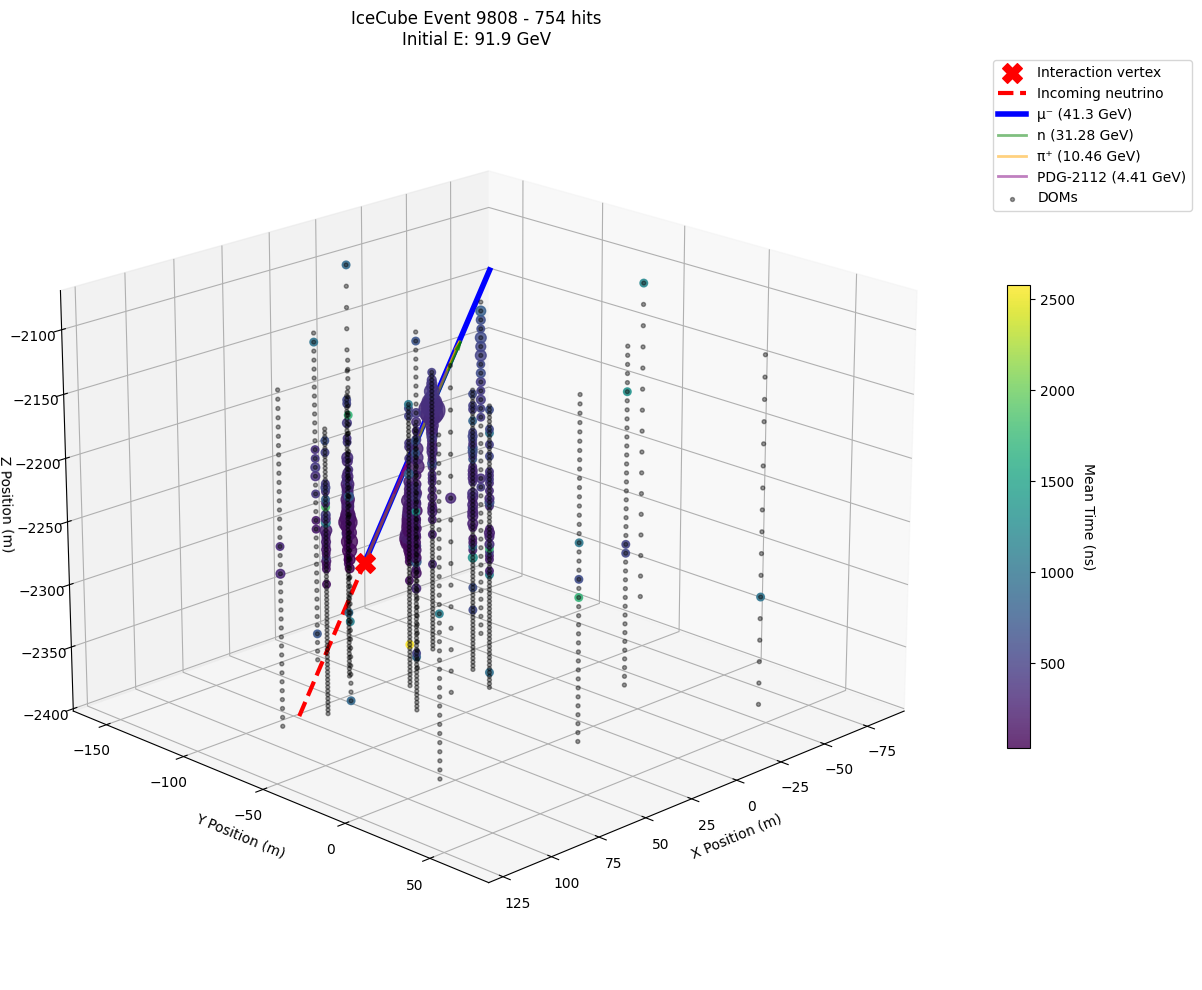

In [36]:
fig = plot_icecube_event(no_hqe, most_doms_hit_idx, 
                        geo_file_path='/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
                        interactive=False)
fig.show()  # For plotly
plt.show()  # For matplotlib

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def create_dom_heatmap(data_dict, geo_file_path=None):
    """
    Create a heatmap showing total hits per DOM across all events.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' data
    geo_file_path : str, optional
        Path to the .geo file containing DOM positions
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    dom_hit_counts : dict
        Dictionary mapping DOM positions to hit counts
    """
    
    # Dictionary to store total hits per DOM position
    dom_hit_counts = defaultdict(int)
    
    print("Processing events to count hits per DOM...")
    
    # Go through all events
    n_events = len(data_dict['photons'])
    for event_idx in range(n_events):
        if event_idx % 100 == 0:  # Progress indicator
            print(f"Processing event {event_idx}/{n_events}")
        
        # Get sensor positions for this event
        photons = data_dict['photons'][event_idx]
        sensor_pos_x = photons['sensor_pos_x']
        sensor_pos_y = photons['sensor_pos_y']
        sensor_pos_z = photons['sensor_pos_z']
        
        # Count hits per unique DOM position in this event
        unique_positions, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_counts=True
        )
        
        # Add to total count for each DOM
        for pos, count in zip(unique_positions, hit_counts):
            # Use tuple as key for DOM position
            dom_key = (round(pos[0], 2), round(pos[1], 2), round(pos[2], 2))
            dom_hit_counts[dom_key] += count
    
    print(f"Finished processing {n_events} events")
    print(f"Found hits on {len(dom_hit_counts)} unique DOM positions")
    
    # Convert to arrays for plotting
    dom_positions = np.array(list(dom_hit_counts.keys()))
    hit_counts = np.array(list(dom_hit_counts.values()))
    
    # Extract coordinates
    dom_x = dom_positions[:, 0]
    dom_y = dom_positions[:, 1]
    dom_z = dom_positions[:, 2]
    
    # Create the plot
    fig = plt.figure(figsize=(15, 12))
    
    # 3D scatter plot
    ax1 = fig.add_subplot(221, projection='3d')
    scatter = ax1.scatter(dom_x, dom_y, dom_z, c=hit_counts, 
                         cmap='hot', s=60, alpha=0.8)
    ax1.set_xlabel('X Position (m)')
    ax1.set_ylabel('Y Position (m)')
    ax1.set_zlabel('Z Position (m)')
    ax1.set_title('3D DOM Hit Distribution')
    cbar1 = plt.colorbar(scatter, ax=ax1, shrink=0.5, aspect=20)
    cbar1.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Top view (X-Y plane)
    ax2 = fig.add_subplot(222)
    scatter2 = ax2.scatter(dom_x, dom_y, c=hit_counts, cmap='hot', s=60, alpha=0.8)
    ax2.set_xlabel('X Position (m)')
    ax2.set_ylabel('Y Position (m)')
    ax2.set_title('Top View (X-Y Plane)')
    ax2.set_aspect('equal')
    cbar2 = plt.colorbar(scatter2, ax=ax2)
    cbar2.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Side view (X-Z plane)
    ax3 = fig.add_subplot(223)
    scatter3 = ax3.scatter(dom_x, dom_z, c=hit_counts, cmap='hot', s=60, alpha=0.8)
    ax3.set_xlabel('X Position (m)')
    ax3.set_ylabel('Z Position (m)')
    ax3.set_title('Side View (X-Z Plane)')
    ax3.set_aspect('equal')
    cbar3 = plt.colorbar(scatter3, ax=ax3)
    cbar3.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Front view (Y-Z plane)
    ax4 = fig.add_subplot(224)
    scatter4 = ax4.scatter(dom_y, dom_z, c=hit_counts, cmap='hot', s=60, alpha=0.8)
    ax4.set_xlabel('Y Position (m)')
    ax4.set_ylabel('Z Position (m)')
    ax4.set_title('Front View (Y-Z Plane)')
    ax4.set_aspect('equal')
    cbar4 = plt.colorbar(scatter4, ax=ax4)
    cbar4.set_label('Total Hits', rotation=270, labelpad=15)
    
    plt.tight_layout()
    
    # Print statistics
    print(f"\nDOM Hit Statistics:")
    print(f"Total DOMs with hits: {len(dom_hit_counts)}")
    print(f"Total hits across all events: {hit_counts.sum()}")
    print(f"Average hits per DOM: {hit_counts.mean():.1f}")
    print(f"Max hits on single DOM: {hit_counts.max()}")
    print(f"Min hits on single DOM: {hit_counts.min()}")
    
    # Find the hottest DOMs
    top_indices = np.argsort(hit_counts)[-10:][::-1]  # Top 10
    print(f"\nTop 10 most active DOMs:")
    for i, idx in enumerate(top_indices):
        pos = dom_positions[idx]
        hits = hit_counts[idx]
        print(f"{i+1:2d}. Position ({pos[0]:7.1f}, {pos[1]:7.1f}, {pos[2]:7.1f}): {hits:5d} hits")
    
    return fig, dom_hit_counts

def create_string_dom_heatmap(data_dict, geo_file_path):
    """
    Create a heatmap using string and DOM numbers from geometry file.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' data
    geo_file_path : str
        Path to the .geo file containing DOM positions
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    """
    
    # Load DOM geometry
    try:
        dom_data = np.loadtxt(geo_file_path, skiprows=4)
        geo_dom_x, geo_dom_y, geo_dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
        geo_string_nums = dom_data[:, 3].astype(int)
        geo_dom_nums = dom_data[:, 4].astype(int)
        
        print(f"Loaded {len(dom_data)} DOMs from geometry file")
        print(f"String numbers range: {geo_string_nums.min()} to {geo_string_nums.max()}")
        print(f"DOM numbers range: {geo_dom_nums.min()} to {geo_dom_nums.max()}")
        
    except:
        print("Error loading geometry file")
        return None, None
    
    # Create mapping from position to string/DOM number
    pos_to_string_dom = {}
    for x, y, z, string_num, dom_num in zip(geo_dom_x, geo_dom_y, geo_dom_z, 
                                           geo_string_nums, geo_dom_nums):
        key = (round(x, 2), round(y, 2), round(z, 2))
        pos_to_string_dom[key] = (string_num, dom_num)
    
    # Dictionary to store total hits per string/DOM
    string_dom_hits = defaultdict(int)
    
    print("Processing events to count hits per string/DOM...")
    
    # Go through all events
    n_events = len(data_dict['photons'])
    for event_idx in range(n_events):
        if event_idx % 100 == 0:
            print(f"Processing event {event_idx}/{n_events}")
        
        # Get sensor positions for this event
        photons = data_dict['photons'][event_idx]
        sensor_pos_x = photons['sensor_pos_x']
        sensor_pos_y = photons['sensor_pos_y']
        sensor_pos_z = photons['sensor_pos_z']
        
        # Count hits per unique DOM position in this event
        unique_positions, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_counts=True
        )
        
        # Map to string/DOM numbers and add to count
        for pos, count in zip(unique_positions, hit_counts):
            pos_key = (round(pos[0], 2), round(pos[1], 2), round(pos[2], 2))
            if pos_key in pos_to_string_dom:
                string_num, dom_num = pos_to_string_dom[pos_key]
                string_dom_hits[(string_num, dom_num)] += count
    
    # Convert to matrix format for heatmap
    string_nums = sorted(set([s for s, d in string_dom_hits.keys()]))
    dom_nums = sorted(set([d for s, d in string_dom_hits.keys()]))
    
    # Create hit matrix
    hit_matrix = np.zeros((len(dom_nums), len(string_nums)))
    for (string_num, dom_num), hits in string_dom_hits.items():
        string_idx = string_nums.index(string_num)
        dom_idx = dom_nums.index(dom_num)
        hit_matrix[dom_idx, string_idx] = hits
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.imshow(hit_matrix, cmap='hot', aspect='auto', origin='upper')
    
    # Set labels
    ax.set_xticks(range(len(string_nums)))
    ax.set_xticklabels(string_nums)
    ax.set_yticks(range(len(dom_nums)))
    ax.set_yticklabels(dom_nums)
    
    ax.set_xlabel('String Number')
    ax.set_ylabel('DOM Number')
    ax.set_title('DOM Hit Heatmap by String and DOM Number')
    ax.set_xlim(70,80)
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Add text annotations for non-zero values (optional, might be too crowded)
    # for i in range(len(dom_nums)):
    #     for j in range(len(string_nums)):
    #         if hit_matrix[i, j] > 0:
    #             text = ax.text(j, i, int(hit_matrix[i, j]),
    #                           ha="center", va="center", color="white", fontsize=8)
    
    plt.tight_layout()
    
    print(f"Created heatmap with {len(string_nums)} strings and {len(dom_nums)} DOMs")
    print(f"Total hits: {hit_matrix.sum()}")
    
    return fig, string_dom_hits

# Usage examples:
# fig1, dom_counts = create_dom_heatmap(deepcore_out)
# plt.show()

# fig2, string_dom_counts = create_string_dom_heatmap(deepcore_out, '../resources/geofiles/icecube.geo')
# plt.show()

Loaded 5783 DOMs from geometry file
String numbers range: 1 to 93
DOM numbers range: 1 to 89
Processing events to count hits per string/DOM...
Processing event 0/10000
Processing event 100/10000
Processing event 200/10000
Processing event 300/10000
Processing event 400/10000
Processing event 500/10000
Processing event 600/10000
Processing event 700/10000
Processing event 800/10000
Processing event 900/10000
Processing event 1000/10000
Processing event 1100/10000
Processing event 1200/10000
Processing event 1300/10000
Processing event 1400/10000
Processing event 1500/10000
Processing event 1600/10000
Processing event 1700/10000
Processing event 1800/10000
Processing event 1900/10000
Processing event 2000/10000
Processing event 2100/10000
Processing event 2200/10000
Processing event 2300/10000
Processing event 2400/10000
Processing event 2500/10000
Processing event 2600/10000
Processing event 2700/10000
Processing event 2800/10000
Processing event 2900/10000
Processing event 3000/10000
P

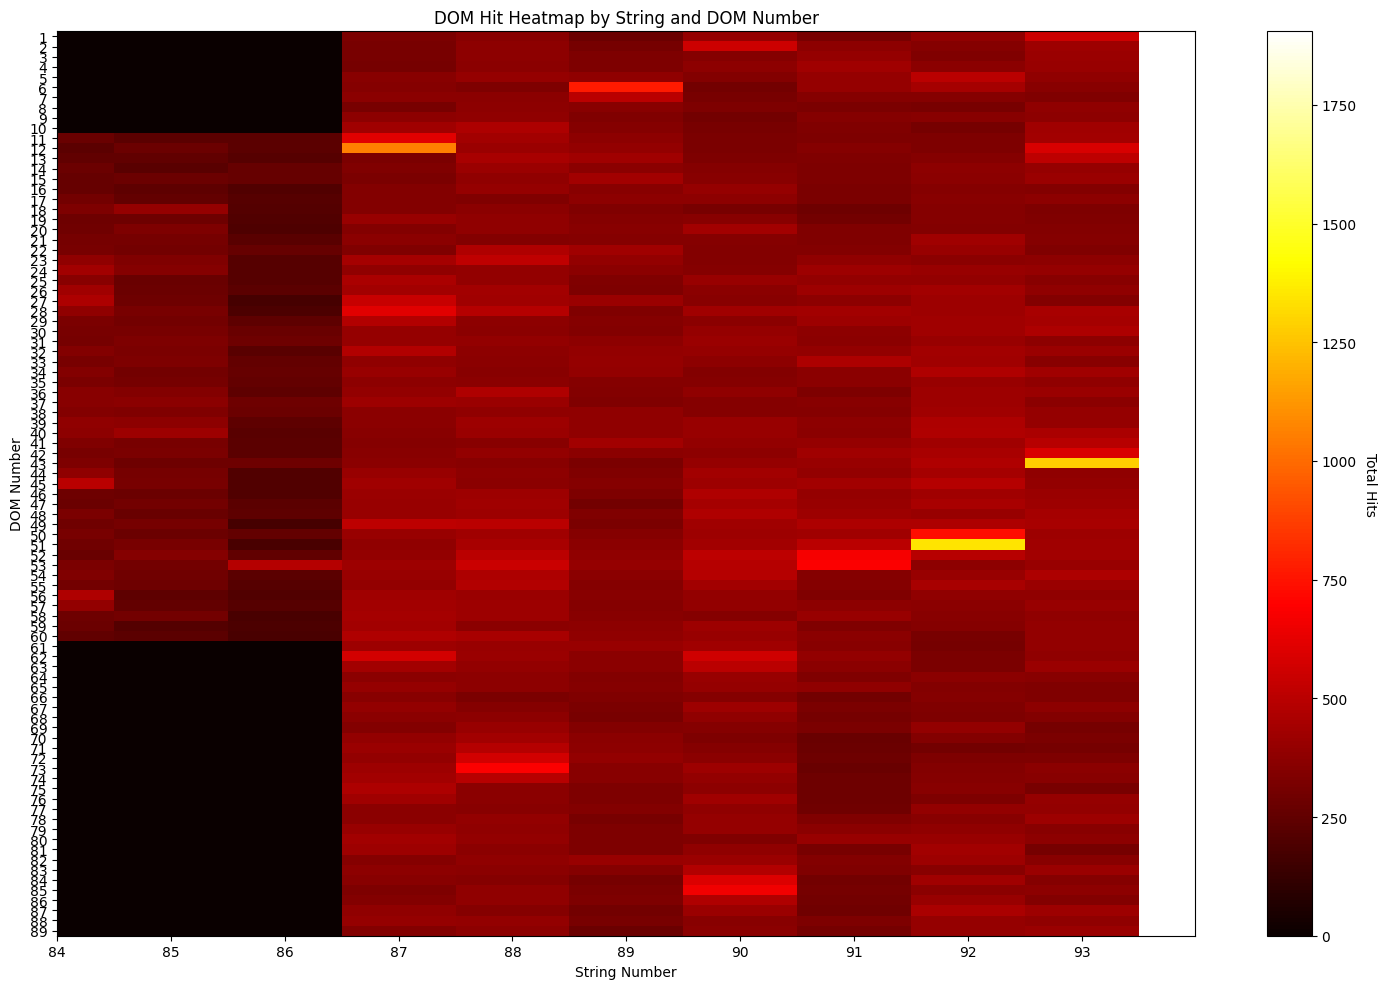

In [46]:
fig2, string_dom_counts = create_string_dom_heatmap(with_hqe, '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo')
plt.show()

In [ ]:
fig2, string_dom_counts = create_string_dom_heatmap(no_hqe, most_doms_hit_idx, 
                        geo_file_path='/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',)
plt.show()

[]

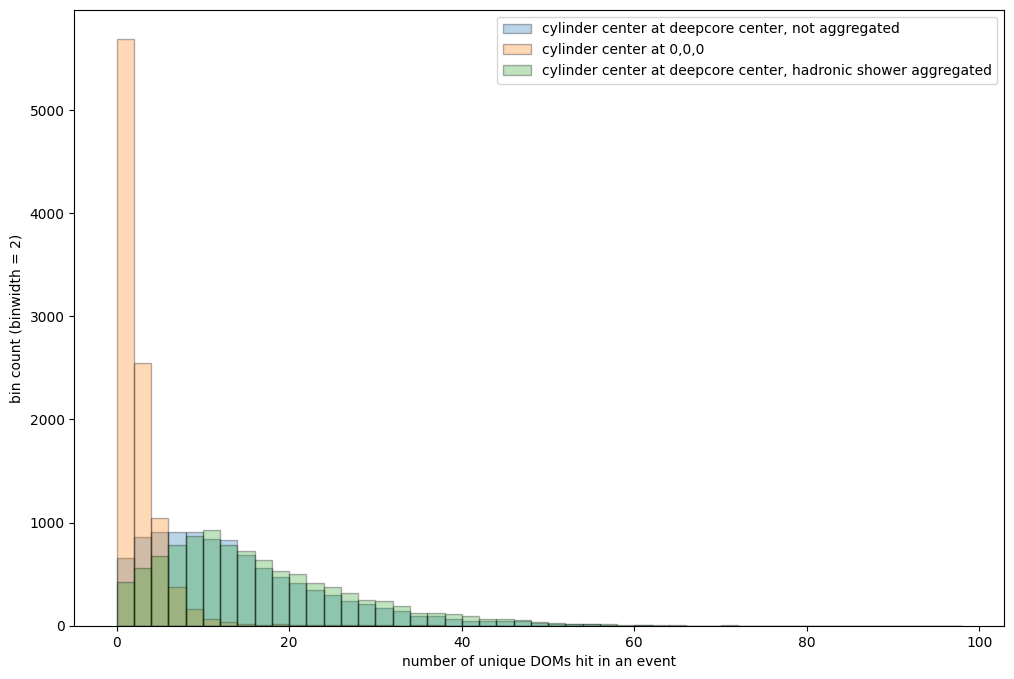

In [7]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

In [8]:

n_hits_tenk_tenk_no_agg[max_hits_idx]

42.0

In [9]:
n_unique_hits_tenk_no_agg[max_hits_idx]

37.0

In [10]:
tenk_no_agg['photons'][max_hits_idx]

{'sensor_pos_x': array([ 124.97,    1.71,   -9.68,   31.25,   31.25,  106.94,   57.2 ,
          57.2 ,  113.19,   57.2 ,  124.97,   31.25,   72.37,  124.97,
         113.19,   57.2 ,   31.25,  -10.97,  -10.97,   57.2 ,  124.97,
         113.19,    1.71,  113.19,   57.2 ,   46.29,   31.25,   31.25,
         124.97,   31.25,   -9.68,   72.37,   57.2 ,    1.71,  124.97,
          31.25,   46.29,   57.2 ,  113.19,   72.37,  113.19, -121.77]),
 'sensor_pos_y': array([-131.25, -150.63,  -79.5 ,  -72.93,  -72.93,   27.09, -105.52,
        -105.52,  -60.47, -105.52, -131.25,  -72.93,  -66.6 , -131.25,
         -60.47, -105.52,  -72.93,    6.72,    6.72, -105.52, -131.25,
         -60.47, -150.63,  -60.47, -105.52,  -34.88,  -72.93,  -72.93,
        -131.25,  -72.93,  -79.5 ,  -66.6 , -105.52, -150.63, -131.25,
         -72.93,  -34.88, -105.52,  -60.47,  -66.6 ,  -60.47, -171.03]),
 'sensor_pos_z': array([-2322.47, -2267.81, -2321.75, -2324.47, -2338.48, -2270.03,
        -2368.79, -2445.88, 

In [11]:
tenk_no_agg['photons'][max_hits_idx]

{'sensor_pos_x': array([ 124.97,    1.71,   -9.68,   31.25,   31.25,  106.94,   57.2 ,
          57.2 ,  113.19,   57.2 ,  124.97,   31.25,   72.37,  124.97,
         113.19,   57.2 ,   31.25,  -10.97,  -10.97,   57.2 ,  124.97,
         113.19,    1.71,  113.19,   57.2 ,   46.29,   31.25,   31.25,
         124.97,   31.25,   -9.68,   72.37,   57.2 ,    1.71,  124.97,
          31.25,   46.29,   57.2 ,  113.19,   72.37,  113.19, -121.77]),
 'sensor_pos_y': array([-131.25, -150.63,  -79.5 ,  -72.93,  -72.93,   27.09, -105.52,
        -105.52,  -60.47, -105.52, -131.25,  -72.93,  -66.6 , -131.25,
         -60.47, -105.52,  -72.93,    6.72,    6.72, -105.52, -131.25,
         -60.47, -150.63,  -60.47, -105.52,  -34.88,  -72.93,  -72.93,
        -131.25,  -72.93,  -79.5 ,  -66.6 , -105.52, -150.63, -131.25,
         -72.93,  -34.88, -105.52,  -60.47,  -66.6 ,  -60.47, -171.03]),
 'sensor_pos_z': array([-2322.47, -2267.81, -2321.75, -2324.47, -2338.48, -2270.03,
        -2368.79, -2445.88, 